<a href="https://colab.research.google.com/github/sandhyab1506/Demonstrations/blob/main/Data_Visualization_NetFlix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#****************************************************************************************************************************

# The Aim is to establish the sales trends in 2017 using the sample_superstore.csv data.
# Author: Sandhya B

#****************************************************************************************************************************


import pandas as pd ##  Importing pandas module

pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt ##  Importing pyplot module from matplotlib library

import seaborn as sns ##  Importing Seaborn module

#Path of the file to read

superstore_filepath = "/content/drive/MyDrive/sample_superstore.csv"

#Read the file into a variable superstore_data

superstore_data = pd.read_csv(superstore_filepath,parse_dates=True)

# Extract year and month from order date
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'],errors='ignore')
superstore_data['Order_Month'] = superstore_data['Order Date'].dt.strftime("%b")
superstore_data['Order_Year'] = superstore_data['Order Date'].dt.strftime('%Y')
superstore_data['Order_Day'] = superstore_data['Order Date'].dt.strftime('%-d')

# Sort superstore_data by order date column
superstore_data.sort_values(by='Order Date', inplace = True)

#Display firt 10 records
superstore_data.head(10)



<ipython-input-33-aea836429e4c>:26: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'],errors='ignore')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Month,Order_Year,Order_Day
540,541,CA-2014-140795,2014-01-02,03/02/2014,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,...,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,6,0.0,206.3160,Jan,2014,2
6547,6548,CA-2014-113880,2014-01-03,05/03/2014,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,...,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172,Jan,2014,3
7948,7949,CA-2014-131009,2014-01-03,05/03/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,...,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.3,0.0000,Jan,2014,3
7949,7950,CA-2014-131009,2014-01-03,05/03/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,...,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.6,-34.9536,Jan,2014,3
5713,5714,US-2014-143707,2014-01-03,05/03/2014,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,...,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,3,0.0,1.6038,Jan,2014,3
8310,8311,CA-2014-168312,2014-01-03,07/03/2014,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,...,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.3,-43.0296,Jan,2014,3
7950,7951,CA-2014-131009,2014-01-03,05/03/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,...,Office Supplies,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,129.552,3,0.2,-22.6716,Jan,2014,3
8309,8310,CA-2014-168312,2014-01-03,07/03/2014,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,137.352,3,0.2,8.5845,Jan,2014,3
157,158,CA-2014-104269,2014-01-03,06/03/2014,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,...,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.2,51.4764,Jan,2014,3
7947,7948,CA-2014-131009,2014-01-03,05/03/2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,...,Office Supplies,Fasteners,Plymouth Boxed Rubber Bands by Plymouth,18.840,5,0.2,-3.5325,Jan,2014,3


In [ ]:
#Get summary for Sales
superstore_data['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

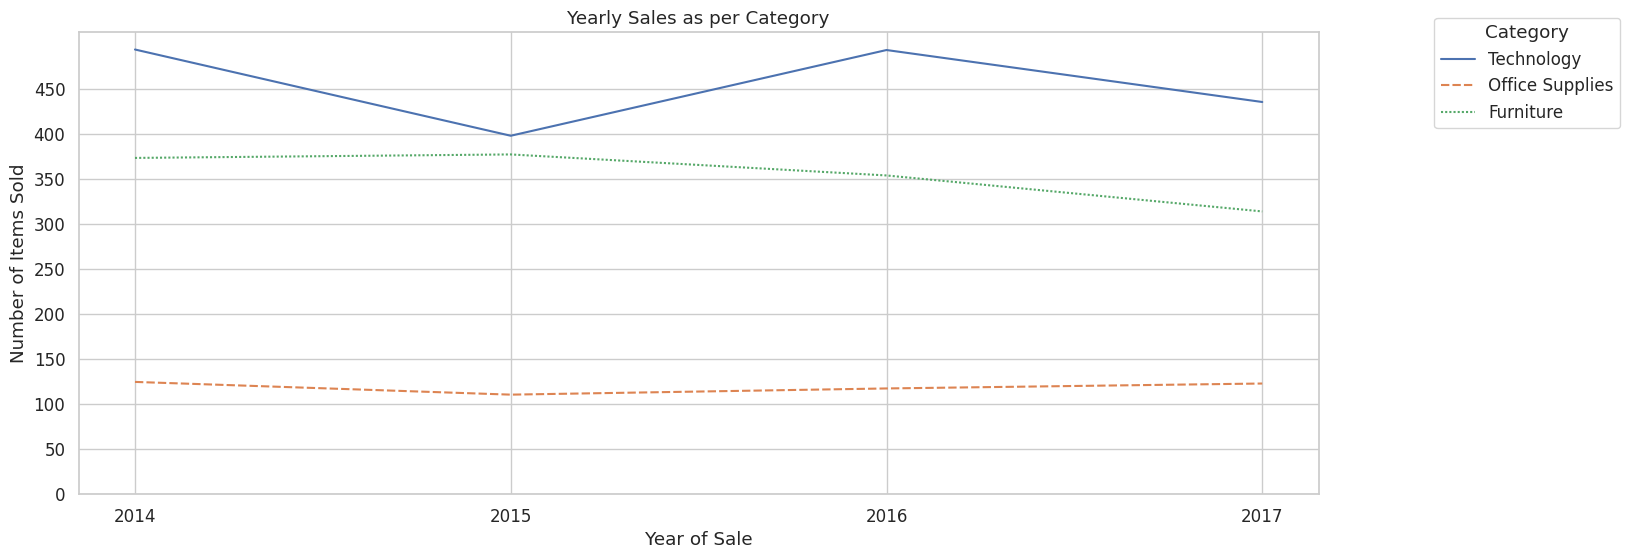

In [ ]:
# creating a plot with 16 X 6 aspect ratio
plt.figure(figsize=(16,6))


# Creating a line plot passing the superstore_data and added Title and custom labels
sns.lineplot(data=superstore_data,x='Order_Year',y='Sales',hue='Category',errorbar=None, style='Category').set(title='Yearly Sales as per Category',xlabel='Year of Sale',ylabel='Number of Items Sold')

# Specify the range of values and interval of the number of items sold
plt.yticks(range(0,500,50))

# Place the legend to the top right position
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 0.95,0.1,0.1), title='Category')


plt.show()

#****************************************************************************************************************************

# Example OUTCOME : In 2017 Furniture and Technology Sales have dropped but Office Supplies Sales seems relatively stable.

#****************************************************************************************************************************

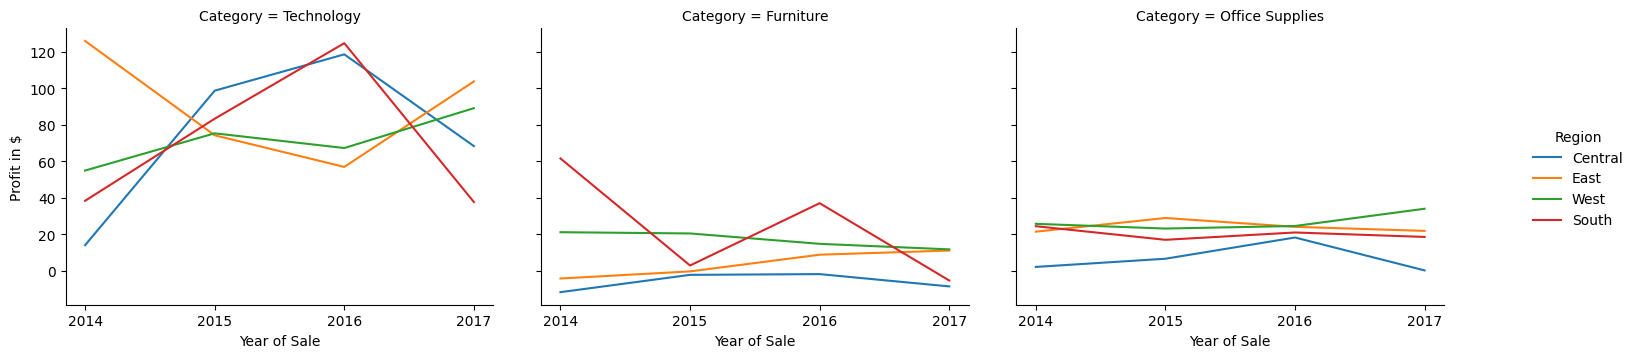

In [ ]:
# Seaborn Line Plots with different Categories using FacetGrid
g = sns.FacetGrid(superstore_data, col='Category', hue='Region')
g = g.map(sns.lineplot, 'Order_Year', 'Profit', errorbar=None).add_legend().set(xlabel='Year of Sale',ylabel='Profit in $')

fig = plt.gcf()
fig.set_size_inches(17, 4)

plt.show()

#****************************************************************************************************************************

# Example OUTCOME : In 2017 technology Sales in East Region made Maximun Profit

#****************************************************************************************************************************

<ipython-input-32-fd4cf3557dd8>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig3 = sns.heatmap(data = superstore_data.corr(),annot=True,cmap="magma",annot_kws={'size': 10},ax=axes[0,2]).set(title='General Picture of Data')


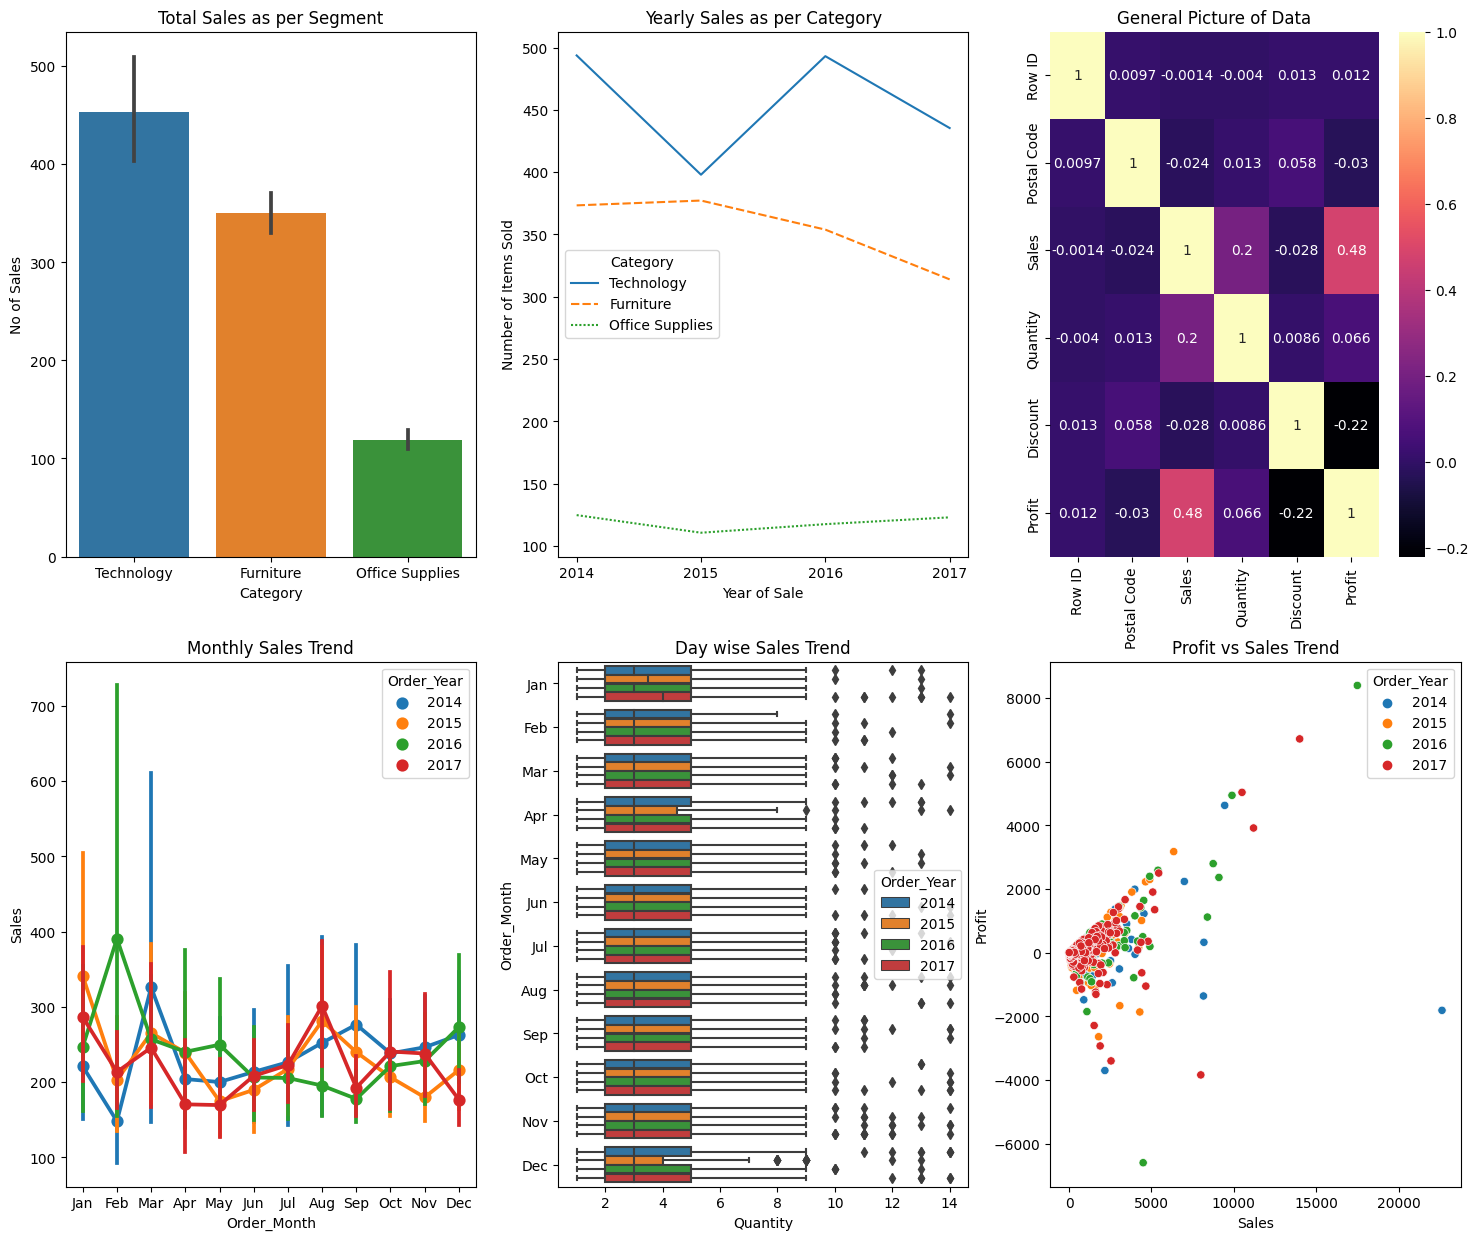

In [32]:
# Select the Superstore data for Orders placed in 2017
superstore_data_2017 = superstore_data[superstore_data['Order_Year'] == 2017].reset_index(drop=False)

# Select the Superstore data under Furniture Category
furniture_data = superstore_data[superstore_data['Category']=='Furniture'].reset_index(drop=False)

# Select the Superstore data under Technology Category
technology_data = superstore_data[superstore_data['Category']=='Technology'].reset_index(drop=False)

# Select the Superstore data under Office Supplies Category
technology_data = superstore_data[superstore_data['Category']=='Office Supplies'].reset_index(drop=False)

# Creating the dashboard to display the graphs
f,axes = plt.subplots(2,3,figsize=(18,15))
#sns.set_style("darkgrid")

fig1 = sns.barplot(x="Category", y='Sales', data = superstore_data, ax=axes[0,0]).set(title='Total Sales as per Segment',ylabel='No of Sales',xlabel='Category')
# Observed OUTCOME : Technology Segment has the hightest total sales

fig2 = sns.lineplot(data=superstore_data,x='Order_Year',y='Sales',hue='Category',errorbar=None, style='Category',ax=axes[0,1]).set(title='Yearly Sales as per Category',xlabel='Year of Sale',ylabel='Number of Items Sold')
# Observed OUTCOME : Technology & Furniture Sales dropped in 2017 but Office Suppuies Sales had a slight increase

fig3 = sns.heatmap(data = superstore_data.corr(),annot=True,cmap="magma",annot_kws={'size': 10},ax=axes[0,2]).set(title='General Picture of Data')
# Observed OUTCOME : Positive Sales and Profit relation can be observed

fig4 = sns.pointplot(data = superstore_data,x='Order_Month',y='Sales',hue='Order_Year',ax=axes[1,0]).set(title='Monthly Sales Trend')
# Observed OUTCOME : In 2017, Jan,Mar, Aug and Oct had better Sales

fig5 = sns.boxplot(data = superstore_data,x='Quantity',y='Order_Month',hue='Order_Year',ax=axes[1,1]).set(title='Day wise Sales Trend')
# Observed OUTCOME : Average Quantity sold evry month is 9

fig6 = sns.scatterplot(data = superstore_data, x='Sales', y='Profit',hue='Order_Year',ax=axes[1,2]).set(title='Profit vs Sales Trend')
# Observed OUTCOME : In 2017, Sales value between 2000 to 5000 has small profit margins


plt.show()

